In [1]:
import pandas as pd
import polars as pl
import numpy as np
from collections import OrderedDict

In [2]:
plantmap_gmx_file = "/mnt/t64/database/gmx/ncbi/ppi/plantmap/plantmap_gmx_links.txt"
stringdb_gmx_file = "/mnt/t64/database/gmx/ncbi/ppi/stringdb/stringdb_gmx_links.txt"

In [3]:
# plantmap_gmx = pl.read_csv(plantmap_gmx_file, separator="\t", n_rows=10000).to_pandas()
# stringdb_gmx = pl.read_csv(stringdb_gmx_file, separator="\t", n_rows=10000).to_pandas()

plantmap_gmx = pl.read_csv(plantmap_gmx_file, separator="\t").to_pandas()
stringdb_gmx = pl.read_csv(stringdb_gmx_file, separator="\t").to_pandas()


In [4]:
plantmap_gmx.iloc[0:3, :]

,protein1,protein2,cf_ms_score,paired1,paired2
0,A0A075W8S1,K7MQ94,0.019608,A0A075W8S1_K7MQ94,K7MQ94_A0A075W8S1
1,A0A075W8S1,K7LQT8,0.019608,A0A075W8S1_K7LQT8,K7LQT8_A0A075W8S1
2,A0A075W8S1,I1MBB5,0.019608,A0A075W8S1_I1MBB5,I1MBB5_A0A075W8S1


In [5]:
stringdb_gmx.iloc[0:3, :]

,protein1,protein2,combined_score,paired1,paired2
0,A0A075W8S1,I1MY95,177,A0A075W8S1_I1MY95,I1MY95_A0A075W8S1
1,A0A075W8S1,A0A0R0G8S3,175,A0A075W8S1_A0A0R0G8S3,A0A0R0G8S3_A0A075W8S1
2,A0A075W8S1,I1KKI2,310,A0A075W8S1_I1KKI2,I1KKI2_A0A075W8S1


In [6]:
# merge all paired1 and paired2 values into a single set
merged_list1 = plantmap_gmx['paired1'].values.tolist() + plantmap_gmx['paired2'].values.tolist() + stringdb_gmx['paired1'].values.tolist() + stringdb_gmx['paired2'].values.tolist()

merged_paired_set = set(merged_list1)

# del plantmap_gmx
# del stringdb_gmx

In [7]:
# show the first 5 elements of the merged set

list(merged_paired_set)[0:5]

['K7MJD1_A0A0R0JL01',
 'A0A0R0JMU3_A0A0R0I3Q1',
 'A0A0R4J465_I1MRB4',
 'A0A0R0FR69_A0A0R0K5D8',
 'A0A0R0FVK4_Q6YGT9']

In [8]:
# convert the set to a pandas dataframe and show the first 5 elements

merged_paired_set_df = pd.DataFrame(list(merged_paired_set), columns=['gene'])

merged_paired_set_df.iloc[0:3, :]

,gene
0,K7MJD1_A0A0R0JL01
1,A0A0R0JMU3_A0A0R0I3Q1
2,A0A0R4J465_I1MRB4


In [9]:
# save the merged paired set

merged_paired_set_df.to_csv("/mnt/t64/database/gmx/ncbi/ppi/merged_paired_set.txt", sep="\t", index=False, header=False)


In [ ]:
# import the ppi data and save to a dictionary

def import_ppi(ppi_file, number = 10000):
    
    ppi_dict = {}

    # read the file and save to the dictionary
    with open (ppi_file, 'r') as ppi:
        flag = 0

        for lines in ppi:
            rec = lines.strip().split('_')
            
            try:
                ppi_dict[rec[0]].append(rec[1])
            except KeyError:
                ppi_dict[rec[0]] = [rec[1]]

            flag += 1
            if flag > number:
                break
    
    # # convert the list to set
    for key, value in ppi_dict.items():
        ppi_dict[key] = set(value)

    return ppi_dict


ppi_dict = import_ppi('/mnt/t64/database/gmx/ncbi/ppi/merged_paired_set.txt', number = 10000)


In [1]:
# import the ppi data and save to a dictionary

def import_ppi(ppi_file):
    
    ppi_dict = {}

    # read the file and save to the dictionary
    with open (ppi_file, 'r') as ppi:

        for lines in ppi:
            rec = lines.strip().split('_')
            
            try:
                ppi_dict[rec[0]].append(rec[1])
            except KeyError:
                ppi_dict[rec[0]] = [rec[1]]
    
    # # convert the list to set
    for key, value in ppi_dict.items():
        ppi_dict[key] = set(value)

    return ppi_dict

ppi_dict = import_ppi('/mnt/t64/database/gmx/ncbi/ppi/merged_paired_set.txt')

In [2]:
# show the first 5 elements of the ppi dictionary

# list(ppi_dict.items())[0:2]

# ppi_dict['A0A075W8S1']
len(ppi_dict.keys())


63353

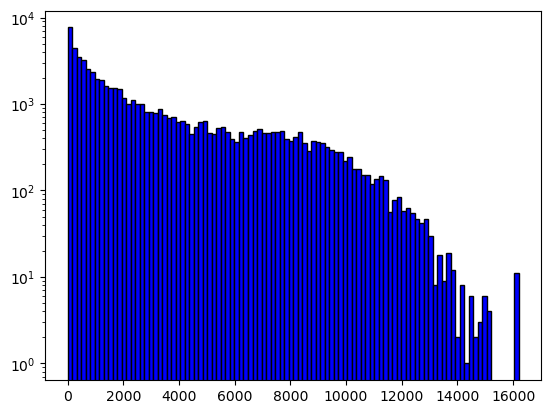

In [3]:
# summary the values number of each key, and draw the bar plot

ppi_dict_values_length = []

for key, value in ppi_dict.items():
    
    ppi_dict_values_length.append(len(value))


import matplotlib.pyplot as plt

plt.hist(ppi_dict_values_length, log=True, bins=100, color='blue', edgecolor='black')
plt.show()


In [1]:
import pandas as pd
import polars as pl
import numpy as np
from collections import OrderedDict

In [2]:
# import all the uiprot ids
# /mnt/t64/database/gmx/ncbi/ppi/uniprotkb_glycine_max_AND_taxonomy_id_3_2024_05_09.tsv
uniprot_ids = pd.read_csv("/mnt/t64/database/gmx/ncbi/ppi/uniprotkb_glycine_max_AND_taxonomy_id_3_2024_05_09.tsv", sep="\t", low_memory=False)


In [ ]:
# import gc
# gc.collect()
# uniprot_ids.iloc[0:5, 0:5]

Entry = uniprot_ids['Entry'].values
GeneID = uniprot_ids['GeneID'].values
EnsemblPlants = uniprot_ids['EnsemblPlants'].values


In [ ]:
# test the random choice

# np.random.choice(len(Entry), 10)

In [ ]:
# create the random pairs
import numpy as np

random_pairs = {}

for i in range(len(Entry)):
    
    protein1 = Entry[i]
    rand_index = np.random.choice(len(Entry), 1000)

    protein2 = set(Entry[rand_index])
    
    try:
        protein2 = protein2 - ppi_dict[protein1]
    except KeyError:
        pass
    
    random_pairs[protein1] = protein2


In [ ]:
# create the dataframe and save the random pairs
random_pairs_df = pd.DataFrame.from_dict(random_pairs, orient='index').stack().reset_index(level=1, drop=True).reset_index()

# random_pairs_df

In [ ]:
# save the random pairs

random_pairs_df.to_csv("/mnt/t64/database/gmx/ncbi/ppi/random_pairs.txt", sep="\t", index=False, header=False)


In [9]:
# filter the gene entry and geneid
uniprot_ids_flt = uniprot_ids[['Entry', 'GeneID', 'EnsemblPlants']]
uniprot_ids_flt.sort_values(by='GeneID', inplace=True)
uniprot_ids_flt.reset_index(drop=True, inplace=True)
uniprot_ids_flt

/tmp/ipykernel_6432/169977348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_ids_flt.sort_values(by='GeneID', inplace=True)


,Entry,GeneID,EnsemblPlants
0,O04104,100037445;,NaN
1,A0A0R0GNE3,100037447;,NaN
2,O48560,100037447;,KRH17522;
3,B0M1A4,100037448;,KRH51611;
4,Q9LLQ8,100037449;,NaN
...,...,...,...
85135,X2JK86,NaN,NaN
85136,X2JR76,NaN,NaN
85137,X5KCT0,NaN,NaN
85138,X5KJA9,NaN,NaN


In [64]:
# import the random pairs

random_pairs = pl.read_csv("/mnt/t64/database/gmx/ncbi/ppi/random_pairs.txt", separator="\t", has_header=False).to_pandas()

random_pairs

,column_1,column_2
0,A6BM07,Q0PJC6
1,A6BM07,I1KEY6
2,A6BM07,K7MLP2
3,A6BM07,K7LR53
4,A6BM07,A0A0R4J5G7
...,...,...
82451824,X5L1K4,A0A0R0HLX7
82451825,X5L1K4,I1MAC8
82451826,X5L1K4,A0A0R0G6X3
82451827,X5L1K4,I1LXQ1


In [65]:
# link the geneid to the random pairs

random_pairs = pd.merge(random_pairs, uniprot_ids_flt, left_on='column_1', right_on='Entry', how='left')
random_pairs.rename(columns={'Entry': 'Entry1', 'GeneID': 'GeneID1', 'EnsemblPlants': 'EnsemblPlants1'}, inplace=True)

random_pairs = pd.merge(random_pairs, uniprot_ids_flt, left_on='column_2', right_on='Entry', how='left')
random_pairs.rename(columns={'Entry': 'Entry2', 'GeneID': 'GeneID2', 'EnsemblPlants': 'EnsemblPlants2'}, inplace=True)

random_pairs

,column_1,column_2,Entry1,GeneID1,EnsemblPlants1,Entry2,GeneID2,EnsemblPlants2
0,A6BM07,Q0PJC6,A6BM07,100101902;,KRH08805;,Q0PJC6,NaN,NaN
1,A6BM07,I1KEY6,A6BM07,100101902;,KRH08805;,I1KEY6,100799779;,KRH55899;
2,A6BM07,K7MLP2,A6BM07,100101902;,KRH08805;,K7MLP2,100775205;,KRH04210;
3,A6BM07,K7LR53,A6BM07,100101902;,KRH08805;,K7LR53,NaN,KRH30642;
4,A6BM07,A0A0R4J5G7,A6BM07,100101902;,KRH08805;,A0A0R4J5G7,100797149;,KRH13434;
...,...,...,...,...,...,...,...,...
82451824,X5L1K4,A0A0R0HLX7,X5L1K4,NaN,NaN,A0A0R0HLX7,NaN,KRH28568;KRH28569;
82451825,X5L1K4,I1MAC8,X5L1K4,NaN,NaN,I1MAC8,100793811;,KRH15906;
82451826,X5L1K4,A0A0R0G6X3,X5L1K4,NaN,NaN,A0A0R0G6X3,NaN,KRH14032;
82451827,X5L1K4,I1LXQ1,X5L1K4,NaN,NaN,I1LXQ1,100802266;,KRH17724;KRH17725;


In [16]:
# remove the overlap geneid

random_pairs2 = random_pairs[random_pairs['GeneID1'] != random_pairs['GeneID2']]
random_pairs2 = random_pairs[random_pairs['EnsemblPlants1'] != random_pairs['EnsemblPlants2']]

random_pairs2.shape


(82450962, 8)

In [17]:
# save the random pairs2
random_pairs2 = random_pairs2[['column_1', 'column_2']]
random_pairs2.to_csv("/mnt/t64/database/gmx/ncbi/ppi/random_pairs2.txt", sep="\t", index=False, header=False)


In [66]:
# import the eggnog 
import pandas as pd
import polars as pl
eggnog_ids = pl.read_csv("/mnt/t64/database/gmx/ncbi/ppi/plantmap/complete_orthogroup_protID_mapping.csv", separator=",", has_header=True).to_pandas()

eggnog_ids.columns

Index(['ID', 'ProteinID', 'spec', 'idtype'], dtype='object')

In [67]:
# filter the idtype != EntryName, spec == soybn
eggnog_ids_flt = eggnog_ids[(eggnog_ids['idtype'] != 'EntryName') & (eggnog_ids['spec'] == 'soybn')]
eggnog_ids_flt = eggnog_ids_flt[['ProteinID', 'ID']].drop_duplicates()
eggnog_ids_flt.reset_index(drop=True, inplace=True)

eggnog_ids_flt

,ProteinID,ID
0,A0A0R0IRM2,ENOG411DRK4
1,I1L967,ENOG411DX20
2,K7L3K2,ENOG411DT94
3,I1JNZ9,ENOG411DRJW
4,I1JEF9,ENOG411DYKC
...,...,...
69461,A0A0R0JSC8,ENOG411E77B
69462,K7MUR7,ENOG411E6H5
69463,A0A0R0FQS3,ENOG411E3NW
69464,A0A0R0KND9,ENOG411DTGA


In [68]:
# merge the random_pairs3 with the uniprot_ids_flt
random_pairs = pd.merge(random_pairs, eggnog_ids_flt, left_on='column_1', right_on='ProteinID', how='left')
random_pairs.rename(columns={'ProteinID': 'Entry3', 'ID': 'EggNOG1'}, inplace=True)

random_pairs = pd.merge(random_pairs, eggnog_ids_flt, left_on='column_2', right_on='ProteinID', how='left')
random_pairs.rename(columns={'ProteinID': 'Entry4', 'ID': 'EggNOG2'}, inplace=True)

random_pairs


,column_1,column_2,Entry1,GeneID1,EnsemblPlants1,Entry2,GeneID2,EnsemblPlants2,Entry3,EggNOG1,Entry4,EggNOG2
0,A6BM07,Q0PJC6,A6BM07,100101902;,KRH08805;,Q0PJC6,NaN,NaN,A6BM07,ENOG411EBXB,NaN,NaN
1,A6BM07,I1KEY6,A6BM07,100101902;,KRH08805;,I1KEY6,100799779;,KRH55899;,A6BM07,ENOG411EBXB,I1KEY6,ENOG411DWD0
2,A6BM07,K7MLP2,A6BM07,100101902;,KRH08805;,K7MLP2,100775205;,KRH04210;,A6BM07,ENOG411EBXB,K7MLP2,ENOG411DUPR
3,A6BM07,K7LR53,A6BM07,100101902;,KRH08805;,K7LR53,NaN,KRH30642;,A6BM07,ENOG411EBXB,K7LR53,ENOG411EHNA
4,A6BM07,A0A0R4J5G7,A6BM07,100101902;,KRH08805;,A0A0R4J5G7,100797149;,KRH13434;,A6BM07,ENOG411EBXB,A0A0R4J5G7,ENOG411DVZW
...,...,...,...,...,...,...,...,...,...,...,...,...
82451824,X5L1K4,A0A0R0HLX7,X5L1K4,NaN,NaN,A0A0R0HLX7,NaN,KRH28568;KRH28569;,NaN,NaN,A0A0R0HLX7,ENOG411DQZV
82451825,X5L1K4,I1MAC8,X5L1K4,NaN,NaN,I1MAC8,100793811;,KRH15906;,NaN,NaN,I1MAC8,ENOG411DSZP
82451826,X5L1K4,A0A0R0G6X3,X5L1K4,NaN,NaN,A0A0R0G6X3,NaN,KRH14032;,NaN,NaN,NaN,NaN
82451827,X5L1K4,I1LXQ1,X5L1K4,NaN,NaN,I1LXQ1,100802266;,KRH17724;KRH17725;,NaN,NaN,I1LXQ1,ENOG411DSMJ


In [60]:
# remove the overlap geneid
print(random_pairs.shape)
random_pairs3 = random_pairs[random_pairs['EggNOG1'] != random_pairs['EggNOG2']]

print(random_pairs3.shape)


(82451829, 12)
(82444146, 12)


In [45]:
# save the random pairs3
random_pairs3 = random_pairs3[random_pairs3['column_1'] != random_pairs3['column_2']]

random_pairs3 = random_pairs3[['column_1', 'column_2']]
random_pairs3.to_csv("/mnt/t64/database/gmx/ncbi/ppi/random_pairs3.txt", sep="\t", index=False, header=False)


In [62]:
# import the targetp results
targetp = pl.read_csv("/mnt/t64/database/gmx/ncbi/targetp/uniprot_summary.targetp2", separator="\t", has_header=True, skip_rows=1).to_pandas()

In [63]:
targetp = targetp.iloc[:, 0:2]
targetp.columns = ['Entry', 'targetp']

targetp

,Entry,targetp
0,A6BM07,noTP
1,A7X657,noTP
2,A7X665,noTP
3,A7X672,noTP
4,A7X680,noTP
...,...,...
85135,X5I168,SP
85136,X5IBM1,SP
85137,X5KCT0,noTP
85138,X5KJA9,noTP


In [69]:
# merge the random_pairs3 with the targetp
print(random_pairs.shape)

random_pairs = pd.merge(random_pairs, targetp, left_on='column_1', right_on='Entry', how='left')
random_pairs.rename(columns={'Entry': 'Entry5', 'targetp': 'targetp1'}, inplace=True)

random_pairs = pd.merge(random_pairs, targetp, left_on='column_2', right_on='Entry', how='left')
random_pairs.rename(columns={'Entry': 'Entry6', 'targetp': 'targetp2'}, inplace=True)

random_pairs

(82451829, 12)


,column_1,column_2,Entry1,GeneID1,EnsemblPlants1,Entry2,GeneID2,EnsemblPlants2,Entry3,EggNOG1,Entry4,EggNOG2,Entry5,targetp1,Entry6,targetp2
0,A6BM07,Q0PJC6,A6BM07,100101902;,KRH08805;,Q0PJC6,NaN,NaN,A6BM07,ENOG411EBXB,NaN,NaN,A6BM07,noTP,Q0PJC6,noTP
1,A6BM07,I1KEY6,A6BM07,100101902;,KRH08805;,I1KEY6,100799779;,KRH55899;,A6BM07,ENOG411EBXB,I1KEY6,ENOG411DWD0,A6BM07,noTP,I1KEY6,noTP
2,A6BM07,K7MLP2,A6BM07,100101902;,KRH08805;,K7MLP2,100775205;,KRH04210;,A6BM07,ENOG411EBXB,K7MLP2,ENOG411DUPR,A6BM07,noTP,K7MLP2,noTP
3,A6BM07,K7LR53,A6BM07,100101902;,KRH08805;,K7LR53,NaN,KRH30642;,A6BM07,ENOG411EBXB,K7LR53,ENOG411EHNA,A6BM07,noTP,K7LR53,noTP
4,A6BM07,A0A0R4J5G7,A6BM07,100101902;,KRH08805;,A0A0R4J5G7,100797149;,KRH13434;,A6BM07,ENOG411EBXB,A0A0R4J5G7,ENOG411DVZW,A6BM07,noTP,A0A0R4J5G7,noTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82451824,X5L1K4,A0A0R0HLX7,X5L1K4,NaN,NaN,A0A0R0HLX7,NaN,KRH28568;KRH28569;,NaN,NaN,A0A0R0HLX7,ENOG411DQZV,X5L1K4,noTP,A0A0R0HLX7,noTP
82451825,X5L1K4,I1MAC8,X5L1K4,NaN,NaN,I1MAC8,100793811;,KRH15906;,NaN,NaN,I1MAC8,ENOG411DSZP,X5L1K4,noTP,I1MAC8,noTP
82451826,X5L1K4,A0A0R0G6X3,X5L1K4,NaN,NaN,A0A0R0G6X3,NaN,KRH14032;,NaN,NaN,NaN,NaN,X5L1K4,noTP,A0A0R0G6X3,noTP
82451827,X5L1K4,I1LXQ1,X5L1K4,NaN,NaN,I1LXQ1,100802266;,KRH17724;KRH17725;,NaN,NaN,I1LXQ1,ENOG411DSMJ,X5L1K4,noTP,I1LXQ1,noTP


In [74]:
# remove the overlap geneid
print(random_pairs.shape)

random_pairs4 = random_pairs[random_pairs['targetp1'] != random_pairs['targetp2']]

print(random_pairs4.shape)


(82451829, 16)
(28697627, 16)


In [75]:
random_pairs4 = random_pairs4[random_pairs4['GeneID1'] != random_pairs4['GeneID2']]
random_pairs4 = random_pairs4[random_pairs4['EnsemblPlants1'] != random_pairs4['EnsemblPlants2']]
random_pairs4 = random_pairs4[random_pairs4['EggNOG1'] != random_pairs4['EggNOG2']]

print(random_pairs4.shape)

(28696665, 16)


In [76]:
# save the random pairs4
random_pairs4 = random_pairs4[['column_1', 'column_2']]

random_pairs4.to_csv("/mnt/t64/database/gmx/ncbi/ppi/random_pairs4.txt", sep="\t", index=False, header=False)
